In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from bitcoin.db import get_all_data
import numpy as np

df = get_all_data()
df = df[df['order_book_bids_price'] > 0].reset_index()
df


2018-03-22 20:20:38,232 root         INFO     Load data from SQL.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,index,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
0,22949,1521713400,7075.76,7080.99,7080.99,7075.76,3.098841,0.079895,1696141.0,0.032095,0.029254,7084.79,7080.86,2.474692,9.0,7080.87,13.632595,6.0
1,22950,1521713460,7080.86,7095.95,7080.87,7095.94,11.592372,0.079831,1695640.0,0.032095,0.003490,7087.56,7087.00,1.240054,3.0,7087.01,0.918303,1.0
2,22951,1521713520,7081.90,7088.46,7088.46,7081.90,1.481697,0.079831,1695655.0,0.034740,0.026661,7083.99,7080.00,0.231222,2.0,7080.01,6.004469,6.0
3,22952,1521713580,7080.00,7080.01,7080.01,7080.01,0.330000,0.079831,1695657.0,0.034740,0.010921,7081.94,7080.00,9.113570,13.0,7080.01,6.721362,8.0
4,22953,1521713640,7080.00,7080.01,7080.00,7080.00,1.610392,0.079831,1695659.0,0.034740,0.003490,7081.08,7080.00,11.500886,16.0,7080.01,2.479500,8.0
5,22954,1521713700,7080.00,7080.01,7080.00,7080.00,1.725158,0.079831,1695669.0,0.034740,0.003490,7081.07,7080.00,3.020348,4.0,7080.01,8.206340,9.0
6,22955,1521713760,7080.00,7080.01,7080.00,7080.01,0.790000,0.079524,1693430.0,0.034740,0.018988,7082.94,7080.00,5.851704,3.0,7080.01,9.195033,11.0
7,22956,1521713820,7060.50,7080.01,7080.01,7060.50,3.369153,0.079524,1693432.0,0.034740,0.003490,7061.81,7060.50,3.367795,7.0,7060.51,1.906766,6.0
8,22957,1521713880,7060.50,7060.51,7060.51,7060.51,1.810238,0.079524,1693432.0,0.034740,0.026661,7064.72,7060.50,7.002413,20.0,7060.51,0.403119,1.0
9,22958,1521713940,7060.50,7079.23,7060.50,7071.09,2.260310,0.079524,1693432.0,0.034740,0.011099,7062.72,7060.50,1.343777,6.0,7062.59,0.707175,2.0


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num


In [3]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
count,2.327400e+04,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000,2.327400e+04,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000,23274.000000
mean,1.520994e+09,7348.289554,7354.334798,7351.529181,7351.407105,1.764396,0.056352,5.622797e+05,0.057006,0.026230,2346.603534,100.935558,0.037531,0.090530,100.941633,0.048311,0.071754
std,4.277545e+05,738.769992,738.331124,738.505027,738.502533,3.920493,0.072793,3.840698e+05,0.034582,0.063591,3272.697898,836.552744,0.516339,1.072987,836.602843,0.857246,0.798480
min,1.520272e+09,5930.000000,5970.960000,5955.390000,5955.390000,0.000673,-0.084993,2.193000e+04,-0.028105,-0.108224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.520622e+09,6785.275000,6793.467500,6790.010000,6790.010000,0.144142,0.016421,2.513375e+05,0.031307,-0.017527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.520983e+09,7301.815000,7307.600000,7305.130000,7305.495000,0.546773,0.041963,4.529245e+05,0.056285,0.024052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.521380e+09,7675.280000,7683.990000,7680.010000,7680.000000,1.753977,0.076738,8.129065e+05,0.081088,0.065034,6666.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.521733e+09,9399.000000,9399.000000,9399.000000,9399.000000,151.743171,0.612404,1.987974e+06,0.173389,0.211511,9689.110000,7125.830000,20.496497,49.000000,7125.840000,44.293855,24.000000


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment,predicted_price,order_book_bids_price,order_book_bids_size,order_book_bids_num,order_book_asks_price,order_book_asks_size,order_book_asks_num
time,1.000000,-0.717122,-0.718604,-0.717966,-0.717906,-0.026213,-0.112004,0.326137,-0.262248,-0.338233,0.844321,0.205666,0.123885,0.143799,0.205666,0.096088,0.153206
low,-0.717122,1.000000,0.999886,0.999929,0.999948,-0.030900,0.058423,0.073482,0.176525,0.592460,-0.466735,-0.051658,-0.031052,-0.036379,-0.051658,-0.024468,-0.037660
high,-0.718604,0.999886,1.000000,0.999948,0.999947,-0.020531,0.059462,0.072093,0.176920,0.592372,-0.468188,-0.051883,-0.031385,-0.036670,-0.051884,-0.024780,-0.037972
open,-0.717966,0.999929,0.999948,1.000000,0.999903,-0.024505,0.058991,0.072677,0.176607,0.592498,-0.467567,-0.051781,-0.031227,-0.036534,-0.051782,-0.024643,-0.037803
close,-0.717906,0.999948,0.999947,0.999903,1.000000,-0.025781,0.058888,0.072819,0.176820,0.592354,-0.467473,-0.051813,-0.031239,-0.036545,-0.051813,-0.024635,-0.037876
volume,-0.026213,-0.030900,-0.020531,-0.024505,-0.025781,1.000000,0.046406,-0.059766,-0.017112,-0.016845,-0.020546,0.015934,0.001892,0.009958,0.015936,-0.002444,-0.001327
tw_sentiment,-0.112004,0.058423,0.059462,0.058991,0.058888,0.046406,1.000000,-0.165471,-0.081714,-0.082231,-0.173798,0.027625,0.019115,0.020892,0.027624,0.013407,0.017164
tw_followers,0.326137,0.073482,0.072093,0.072677,0.072819,-0.059766,-0.165471,1.000000,-0.189531,0.287207,0.440195,0.171636,0.105005,0.122773,0.171635,0.083625,0.126727
reddit_sentiment,-0.262248,0.176525,0.176920,0.176607,0.176820,-0.017112,-0.081714,-0.189531,1.000000,-0.106627,-0.351742,-0.155122,-0.091430,-0.106582,-0.155121,-0.068508,-0.114871
google_sentiment,-0.338233,0.592460,0.592372,0.592498,0.592354,-0.016845,-0.082231,0.287207,-0.106627,1.000000,-0.173369,-0.032109,-0.018178,-0.023901,-0.032109,-0.017895,-0.022028


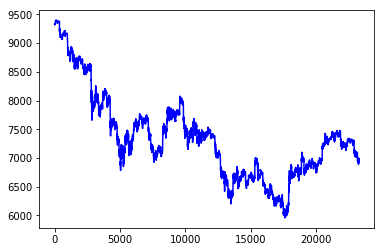

In [5]:
plt.plot(df['close'], 'b')

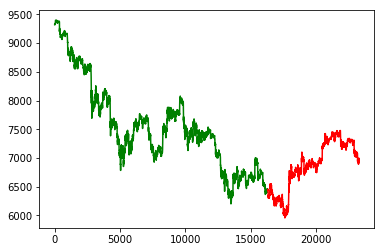

In [6]:
max = df['open'].count()
limit = int(0.3 * max)
plt.plot(df['open'][0:max - limit], 'g')
plt.plot(df['open'][-limit:], 'r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11398dba8>,
      dtype=object)

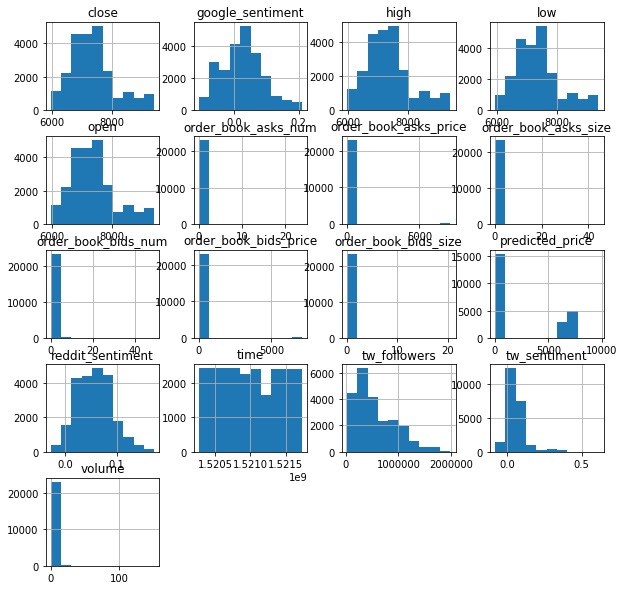

In [7]:
df.hist(figsize=(10,10))

In [8]:
from bitcoin.core import Core
core = Core()
core.train_scaler(df=df)

2018-03-22 16:53:52,711 root         INFO     ENV => test
2018-03-22 16:53:52,712 root         INFO     Train Scaler Model


(MinMaxScaler(copy=True, feature_range=(-1, 1)),
 MinMaxScaler(copy=True, feature_range=(-1, 1)))

In [9]:
from bitcoin.core import Core
core = Core()
history = core.train(df=df)

2018-03-22 16:53:52,788 root         INFO     ENV => test
2018-03-22 16:53:52,790 root         INFO     Train Model
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            161600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

Epoch 30/100
16291/16291 [==============================] - 2s 95us/step - loss: 42.7166 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0459 - val_loss: 40.7752 - val_mean_squared_error: 3.2868e-04 - val_mean_absolute_error: 0.0165
Epoch 31/100
16291/16291 [==============================] - 2s 94us/step - loss: 40.7885 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0299 - val_loss: 38.9420 - val_mean_squared_error: 0.0022 - val_mean_absolute_error: 0.0362
Epoch 32/100
16291/16291 [==============================] - 2s 99us/step - loss: 38.9500 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0442 - val_loss: 37.1984 - val_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0625
Epoch 33/100
16291/16291 [==============================] - 2s 94us/step - loss: 37.2021 - mean_squared_error: 0.0066 - mean_absolute_error: 0.0663 - val_loss: 35.4898 - val_mean_squared_error: 0.0119 - val_mean_absolute_error: 0.0809
Epoch 34/100
16291/16291 [==============================

Epoch 65/100
16291/16291 [==============================] - 2s 99us/step - loss: 6.8335 - mean_squared_error: 9.4546e-04 - mean_absolute_error: 0.0206 - val_loss: 6.4400 - val_mean_squared_error: 4.7723e-05 - val_mean_absolute_error: 0.0045
Epoch 66/100
16291/16291 [==============================] - 2s 96us/step - loss: 6.4572 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0217 - val_loss: 6.0835 - val_mean_squared_error: 6.6552e-05 - val_mean_absolute_error: 0.0067
Epoch 67/100
16291/16291 [==============================] - 2s 94us/step - loss: 6.0993 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0225 - val_loss: 5.7401 - val_mean_squared_error: 1.1801e-04 - val_mean_absolute_error: 0.0096
Epoch 68/100
16291/16291 [==============================] - 2s 144us/step - loss: 5.7528 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0224 - val_loss: 5.4200 - val_mean_squared_error: 1.0118e-04 - val_mean_absolute_error: 0.0087
Epoch 69/100
16291/16291 [=====================

16291/16291 [==============================] - 1s 91us/step - loss: 1.2140 - mean_squared_error: 9.0905e-04 - mean_absolute_error: 0.0201 - val_loss: 1.1559 - val_mean_squared_error: 9.1005e-05 - val_mean_absolute_error: 0.0067
Epoch 100/100
16291/16291 [==============================] - 2s 97us/step - loss: 1.1692 - mean_squared_error: 9.0044e-04 - mean_absolute_error: 0.0199 - val_loss: 1.1147 - val_mean_squared_error: 9.1146e-05 - val_mean_absolute_error: 0.0067


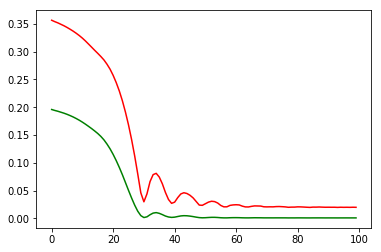

In [10]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error'], 'g')

In [11]:
core.train_anomaly(df=df)

2018-03-22 16:56:38,728 root         INFO     Train Anomaly Model


Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   37.5s
[Parallel(n_jobs=10)]: Done 150 out of 150 | elapsed:   57.4s finished


KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [44]:
df_predicted = core.test_order_percent(df=df)

2018-03-22 18:48:22,793 root         INFO     Error Order percentage: 0.44%
2018-03-22 18:48:22,795 root         INFO     TEST From 2018-03-17 19:09:00 to 2018-03-22 16:43:00
2018-03-22 18:48:22,796 root         INFO     Number of api calls: 0.02 / min
2018-03-22 18:48:22,798 root         INFO     Number of anomalies: 29
2018-03-22 18:48:22,799 root         INFO     With prediction 740.13 euros => -25.99% => -6.50% / day
2018-03-22 18:48:22,800 root         INFO     Without prediction 1084.59 euros => 8.46% => 2.11% / day


In [40]:
df_predicted.describe()

,predicted,real,diff,diff_std
count,6982.000000,6982.000000,6982.000000,6982.000000
mean,6882.810897,6873.236432,-9.574464,-0.574464
std,405.768709,415.205161,13.362757,13.362757
min,5997.240000,5955.390000,-77.710000,-68.710000
25%,6656.300000,6644.892500,-16.685000,-7.685000
50%,6912.095000,6906.500000,-5.900000,3.100000
75%,7264.905000,7263.000000,-1.730000,7.270000
max,7478.360000,7477.500000,77.520000,86.520000


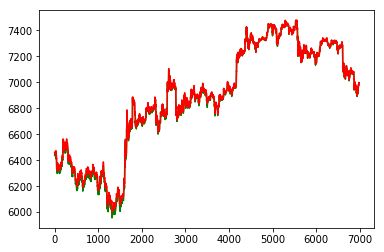

In [22]:
n_test = int(0.3 * df['open'].count())
df_test = df[-n_test:].reset_index()
plt.plot(df_test['close'], 'g')
plt.plot(df_predicted['predicted'], 'r')